<a href="https://colab.research.google.com/github/Debojyoti83/Business-Case-Walmart---Confidence-Interval-and-CLT-Associated-with-Scaler/blob/main/Business_Case_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Business Case: Walmart - Confidence Interval and CLT***

#**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

#**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

#**Import Libraries**

* Importing the necessary libraies for data analysis and visualization. this libraries include **pandas, numpy, matplotlib.pyplot,** and **seaborn**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Loading The Dataset**
*   Next, load the Walmart dataset using the **pd.read_csv()** function, and named it as df.

In [ ]:
!gdown 1GwUI8LDCHHeIrNppXOnS2Eh7wqinJPIe

Downloading...
From: https://drive.google.com/uc?id=1GwUI8LDCHHeIrNppXOnS2Eh7wqinJPIe
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 178MB/s]


In [ ]:
df = pd.read_csv("/content/walmart_data.csv")  # for making changes

df_org = pd.read_csv("/content/walmart_data.csv") # to refer to original dataframe

*   Next, let's look at the **first five** records of the dataset to understand its structure.

In [ ]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#**Concise Summary**
*   Next get a concise summary of the dataset using **pd.info()** function. it provides information total rows, column and about the number of non-null values and data types of each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.shape
print(f"Number of rows : {df.shape[0]} \nNumber of columns : {df.shape[1]}")

Number of rows : 550068 
Number of columns : 10


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum().sum()

0

***Observations :***

*  There are 5,50.068 rows and 10 columnsin the data.
*  There are no null values.
*  There are also no duplicate values.
*  The columns **"User_ID"**, **"Occupation"**, **"Marital_Status"**, **"Product_Category"** and **"Purchase"** have int datatype.
*  Rest of the columns **"Product_ID"**, **"Gender"**, **"Age"**, **"City_Category"** and **"Stay_In_Current_City_Years"** have object datatype.
*  The columns **"Gender"**, **"Age"**, **"City_Category"**, **"Stay_In_Current_City_Years"** and **"Marital_Status"** can be converted into category datatype.

 Converting **"Gender"**, **"Age"**, **"City_Category"**, **"Stay_In_Current_City_Years"** and **"Marital_Status"** into categorical datatype.

In [ ]:
cols = ["Gender", "Age", "City_Category", "Stay_In_Current_City_Years", "Marital_Status"]
for i in cols :
  df[i] = df[i].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


#**Descriptive Statistics**
*   It is important to understand the dataset's overall characteristics, using
 **pd.describe()** function. such as **count, mean, standard deviation, minimun,maximun** and **quartiles**. Although, here only **"Purchase** will be use of us.

In [ ]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.0,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,2.0,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,0.0,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,324731.0,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,8.000000,12054.000000


***Observations :***
*  Range of purchase amount is 12 dollars to 23961 dollars.
*  Mean purchase amount is 9264 dollars.
*  Median purchase amount is 8047 dollars.
*  Standard deviation of purchase amount is 5023 dollars.
*  Inter quartile range (IQR) of purchase amount are from 5823 to 12054 dollars.

#**Value Counts and Unique Attributes**

In [ ]:
for i in df.columns[:4] :
  print("Value counts for column", i, ":")
  print(df[i].value_counts())
  print("-"*50)

Value counts for column User_ID :
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
--------------------------------------------------
Value counts for column Product_ID :
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64
--------------------------------------------------
Value counts for column Gender :
M    414259
F    135809
Name: Gender, dtype: int64
--------------------------------------------------
Value counts for column Age :
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
--------------------------------------------------


In [ ]:
for i in df.columns[4:7] :
  print("Value counts for column", i, ":")
  print(df[i].value_counts())
  print("-"*50)

Value counts for column Occupation :
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
--------------------------------------------------
Value counts for column City_Category :
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
--------------------------------------------------
Value counts for column Stay_In_Current_City_Years :
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
--------------------------------------------------


In [ ]:
for i in df.columns[7:] :
  print("Value counts for column", i, ":")
  print(df[i].value_counts())
  print("-"*50)

Value counts for column Marital_Status :
0    324731
1    225337
Name: Marital_Status, dtype: int64
--------------------------------------------------
Value counts for column Product_Category :
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64
--------------------------------------------------
Value counts for column Purchase :
7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64
--------------------------------------------------


***Insights :***
*  Most frequent user have made close to 1000 purchases.
*  Least frequent users have made 6 or 7 purchases.
*  P00265242 is the most sold product.
*  Out of 550068	users in the dataset, 414259 are male and 135809 are female.
*  People in age group of 26-35 make more purchases than any other age groups.
*  Peopple of city category B make more purchases than other city categories.
*  People who have stayed in their city for only one year make more  purchases than others.
*  People who have stayed for less than a year or more than 4 years make least number of purchases.
*  Unmarried people make more purchases than married people.
*  Product categories 5,1 and 8 sell more than other categories.
*  Product categories 17 and 9 sell teh least.

***Recomendation :***
*  Walmart can keep products like P00265242 and P00025442 (which are selling a lot) in the inventory. Products like P00056342 P00350742 (which are not selling) need not be kept in store.
*  Ads can be targetted towards people of age group 26–35, since they are making maximum purchases. Walmart can also include new products required by people of this age group.
*  Ads can be targetted towards people of city category B. Inventory in these cities can be replenished.
*  Ads can be targetted towards people who have spent between 1 to 2 years in their cities.
*  Ads can be targetted towards unmarried people.
*  Products of categories 1, 5 and 8 can be kept in inventory as well as made easily visible in the stores.



#**Outlier Detection**
Outliers are values in a column which are either very high or very low compared to most other values in columns. Presence of outliers can lead to misleading analysis specially whenmetrics like mean and sum are concerned. let's check if there are any outliers in the **"Purchase"** column. We will use the IQR method for finding outliers.

In [ ]:
for i in ["Purchase"] :
  outliers = []
  p25 = np.percentile(df[i], 25)
  p75 = np.percentile(df[i], 75)
  iqr = p75 - p25
  max_pur = min(max(df["Purchase"]),p75 + iqr*1.5)
  min_pur = max(0,p25 - iqr*1.5)
  outliers = df.loc[(df[i]<min_pur) | (df[i]>max_pur),i]
  print("Outliers for column",i,":")
  print(outliers)
  print("Number of outliers :", len(outliers))
  print("Percentage of outliers :",round((len(outliers)/len(df[i]))*100,2),"%")

Outliers for column Purchase :
343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: Purchase, Length: 2677, dtype: int64
Number of outliers : 2677
Percentage of outliers : 0.49 %


**"Purchase"** column contains 2677 outliers. This is 0.49% of total number of entries.

#**Visual Analysis - Univariate & Bivariate**

***Univariate Analysis***

For Univariate analysis we will use boxplots, distplots and countplots.
Creating a box plot for **"Purchase"** feature.

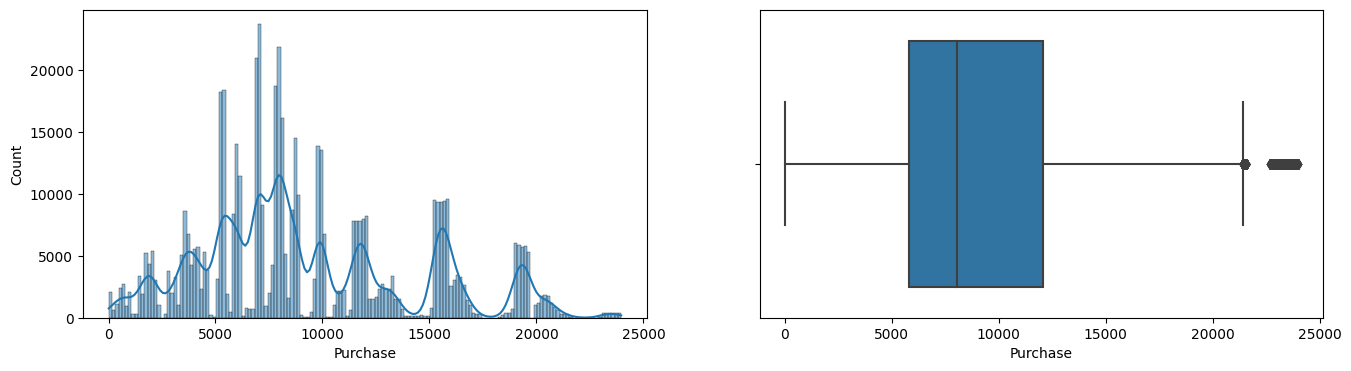

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.histplot(data=df, x='Purchase', kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df, x='Purchase', orient='h')
plt.show()

***Insights :***
*  Median purchase is about 8000 dollars.
*  There are many outliers.
*  Inter Quartile Range is 6000 to 12000 dollars.

***Recommendations :***

*  Offers/rewards can be given on purchases above 12000 dollars to nudge customers to make more purchases.

***Understanding the distribution of data for the categorical variables***
*  Gender
*  Age
*  Occupation
*  City_Category
*  Stay_In_Current_City_Years
*  Marital_Status
*  Product_Category
*  Purchase( Converted to bins)

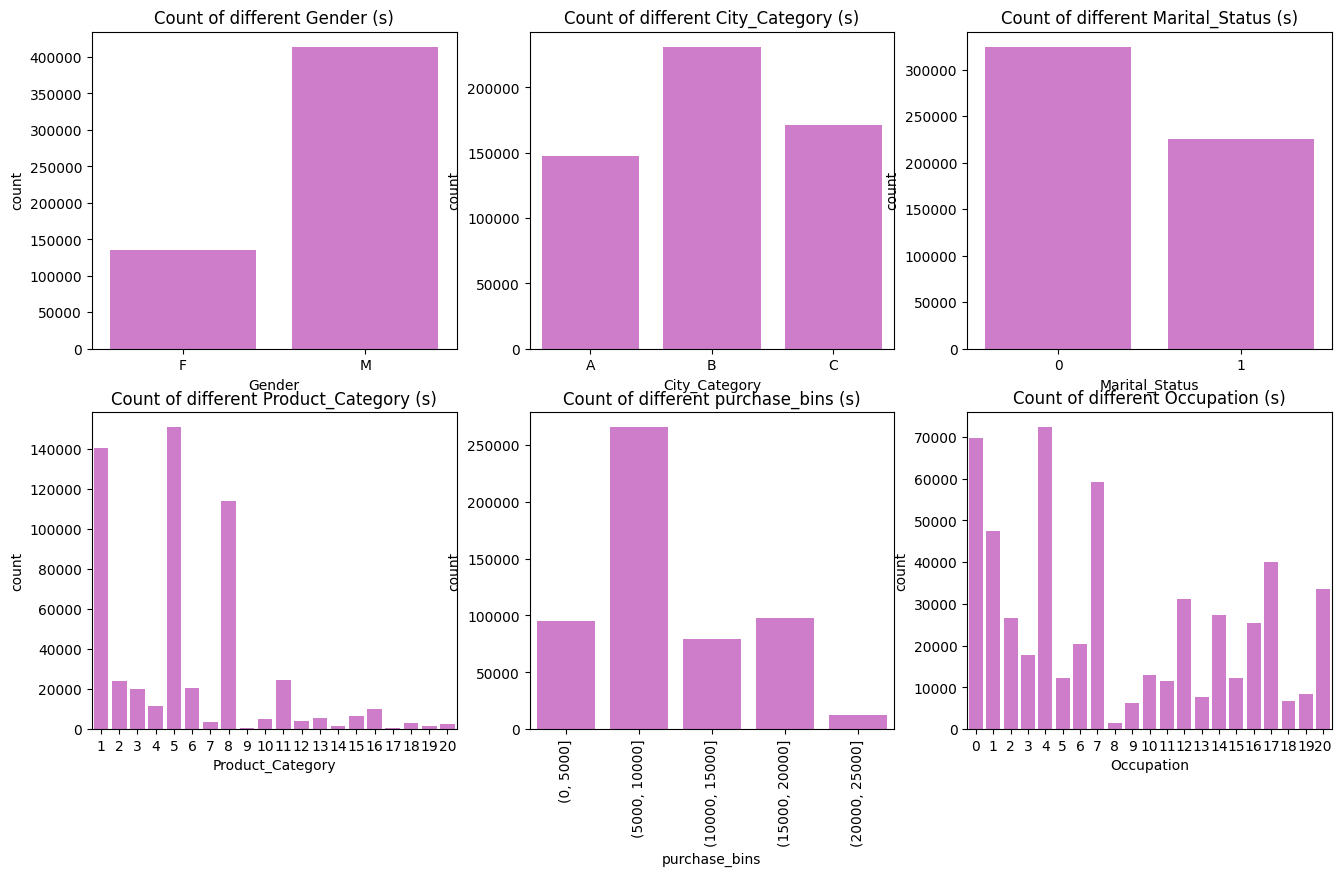

In [ ]:
# Creating bins of purchase amount
df['purchase_bins'] = pd.cut(df['Purchase'], bins = [0,5000,10000,15000,20000,25000])

# Creating count plots for categorical variables
plt.figure(figsize = (16,14))
temp = ['Gender', 'City_Category', 'Marital_Status', 'Product_Category', 'purchase_bins', 'Occupation']
for i in range(len(temp)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[temp[i]], color = 'orchid')
    plt.title('Count of different {temp_i} (s)'.format(temp_i = temp[i]))
    if temp[i] in ['purchase_bins']:
        plt.xticks(rotation = 90)
plt.show()

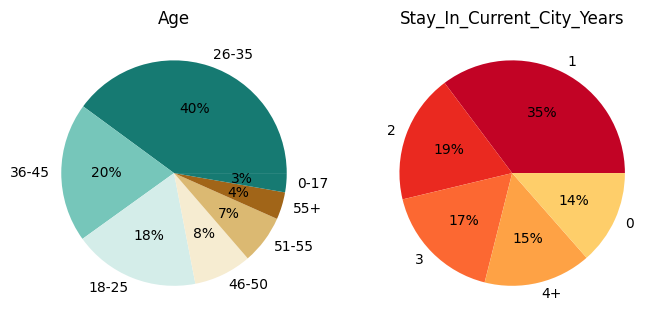

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
data = df['Age'].value_counts(normalize=True)*100
palette_color = sns.color_palette('BrBG_r')
axs[0].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[0].set_title("Age")

data = df['Stay_In_Current_City_Years'].value_counts(normalize=True)*100
palette_color = sns.color_palette('YlOrRd_r')
axs[1].pie(x=data.values, labels=data.index, autopct='%.0f%%', colors=palette_color)
axs[1].set_title("Stay_In_Current_City_Years")
plt.show()

***Insights :***
*  Most of the users are Male.
*  There are 20 different types of Occupation and Product_Category.
*  More users belong to B City_Category.
*  More users are Single as compare to Married.
*  People of age group 26–35 have made the maximum number of purchases.
*  People who have stayed in their city for a year have made the maximum number of purchases.
*  Products of category 1, 5 and 8 sold most frequently.
*  People of occupation 0,4 and 7 have made more purchases than other occupations.

***Bi-variate Analysis***

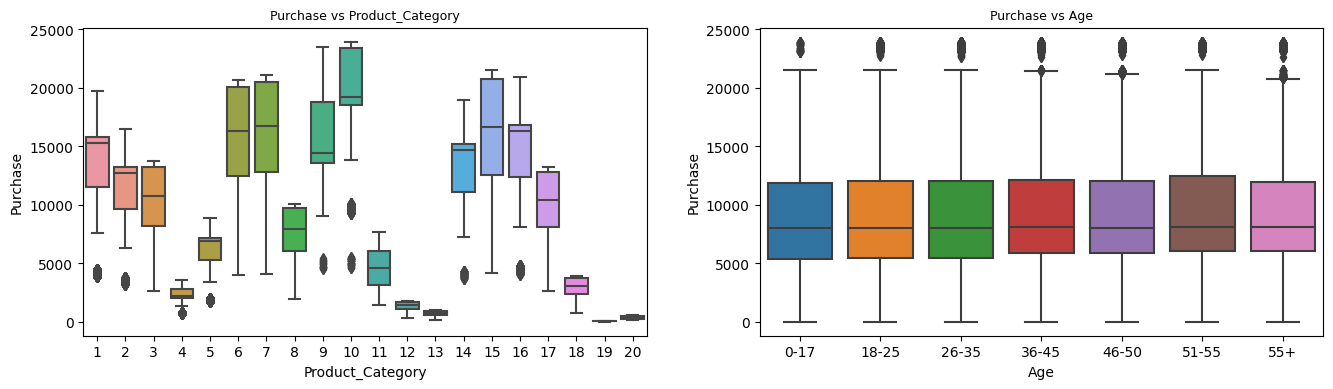

In [ ]:
fig = plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.boxplot(data=df, x='Product_Category', y='Purchase')
plt.title("Purchase vs Product_Category", fontsize =9)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Age', y='Purchase')
plt.title("Purchase vs Age", fontsize=9)
plt.show()

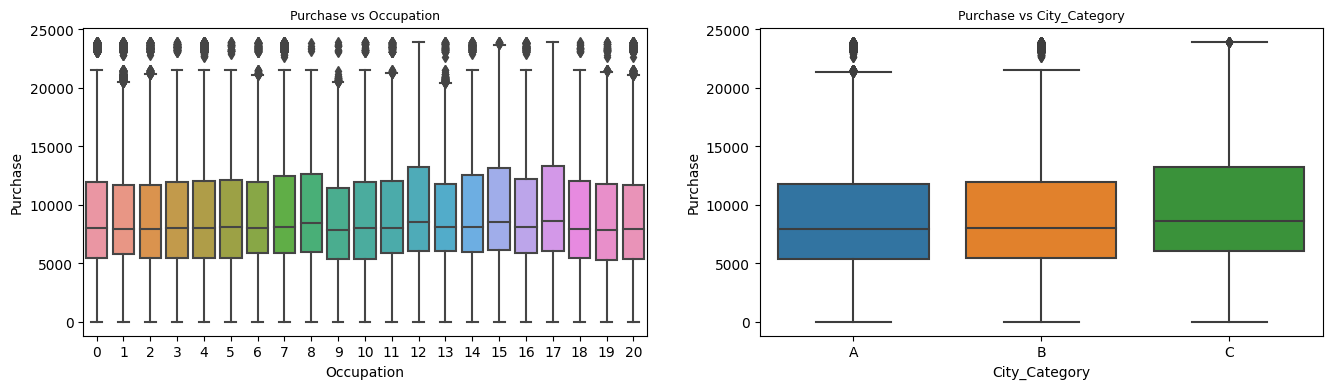

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
sns.boxplot(data=df, x='Occupation', y='Purchase', ax=axs[0])
axs[0].set_title("Purchase vs Occupation", fontsize =9)

sns.boxplot(data=df, x='City_Category', y='Purchase', ax=axs[1])
axs[1].set_title("Purchase vs City_Category", fontsize =9)
plt.show()

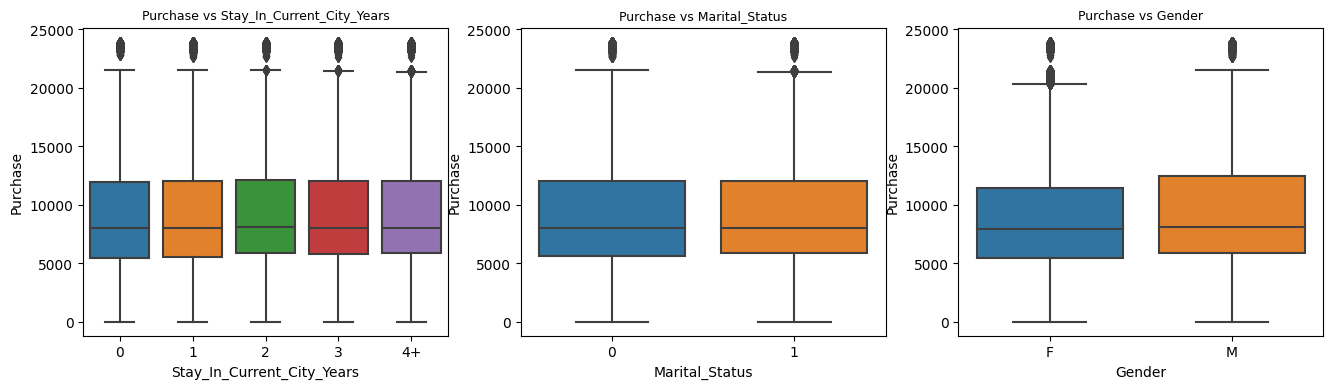

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
sns.boxplot(data=df, x='Stay_In_Current_City_Years', y='Purchase', ax=axs[0])
axs[0].set_title("Purchase vs Stay_In_Current_City_Years", fontsize =9)

sns.boxplot(data=df, x='Marital_Status', y='Purchase', ax=axs[1])
axs[1].set_title("Purchase vs Marital_Status", fontsize =9)

sns.boxplot(data=df,x='Gender', y='Purchase', ax=axs[2])
axs[2].set_title("Purchase vs Gender", fontsize=9)
plt.show()

***Multivariate Analysis***

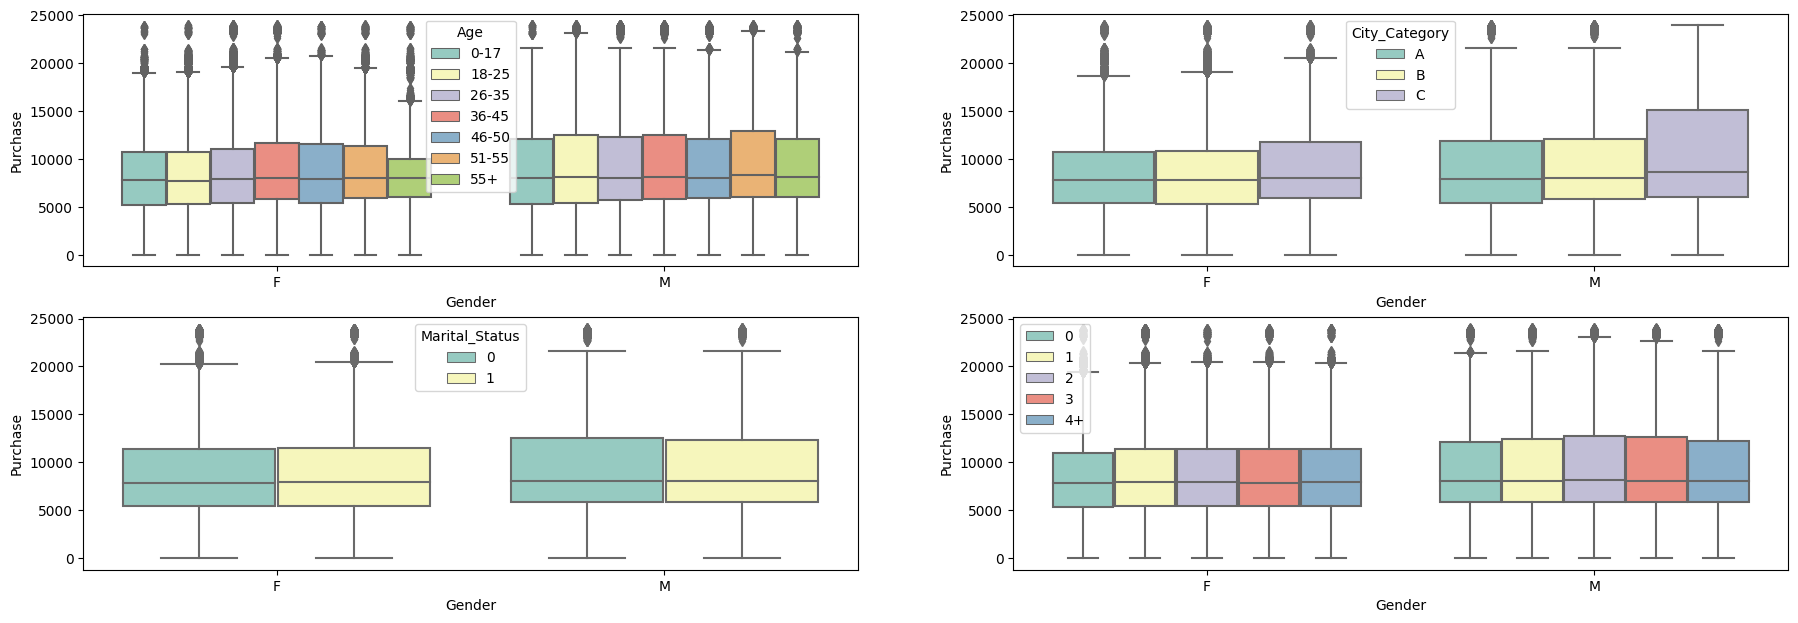

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(22, 4))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Age', palette='Set3', ax=axs[0,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='City_Category', palette='Set3', ax=axs[0,1])

sns.boxplot(data=df, y='Purchase', x='Gender', hue='Marital_Status', palette='Set3', ax=axs[1,0])
sns.boxplot(data=df, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set3', ax=axs[1,1])
axs[1,1].legend(loc='upper left')

plt.show()

***Insights :***

*  Median purchase amounts of males and females are similar.
*  Median purchase amounts of all age groups are similar.
*  Median purchase amounts of product category 10 is highest, category 19 is lowest.
*  Median purchase amount of occupations 12 and 17 are slightly higher than other occupations.

We will now find if there is any correlation between the numerical features in the data. To include categorical features like gender and age groups in our correlation analysis, we will convert them into numerical features.

***Converting Gender, Age and City_Category to numeric data :***

In [ ]:
df_copy = df_org.copy()
df_copy['Gender'].replace({'F' : 1, 'M': 0}, inplace = True)
df_copy['Age'].replace({'0-17':1, '18-25':2,'26-35':3, '36-45':4,'46-50':5,'51-55':6,'55+':7 }, inplace=True)
df_copy['City_Category'].replace({'A':1, 'B':2, 'C':3}, inplace=True)

Creating a heatmap using the above table. This will make it easier to find values of high magnitude.

<ipython-input-26-52f9fc564e8f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr().round(2), annot=True)


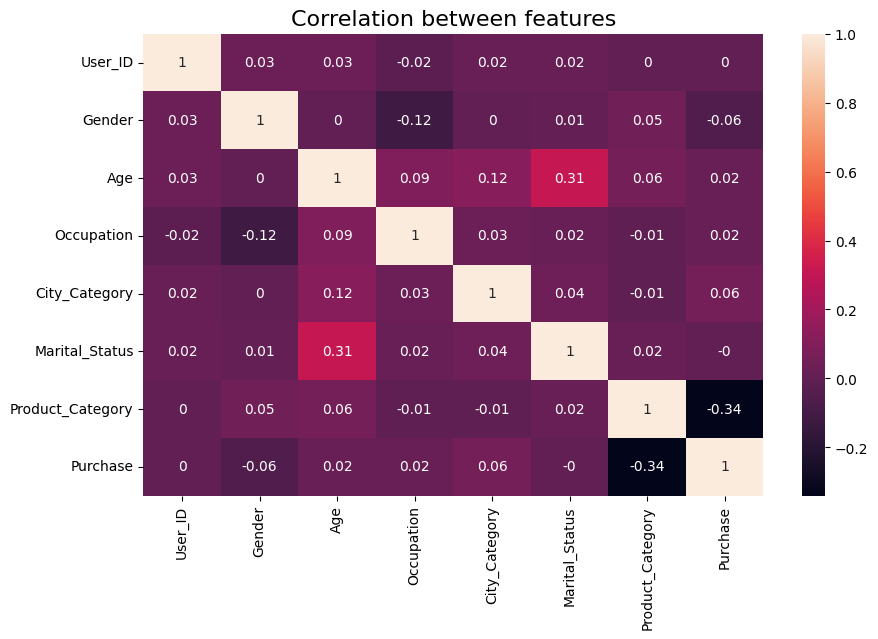

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Correlation between features', fontsize=16)
sns.heatmap(df_copy.corr().round(2), annot=True)
plt.show()

***Insights :***

*  We don’t see a strong correlation of purchase with any feature.
*  There’s a weak negative correlation between product category and purchase amount.
*  Weak positive correlation between age and marital status.

We will plot all the numerical features against one-another in pairs. Because gender is a primary focus in our analysis, we will plot male and female data points in different colors. In the plot below, blue dots represent male data while orange dots represent female data.

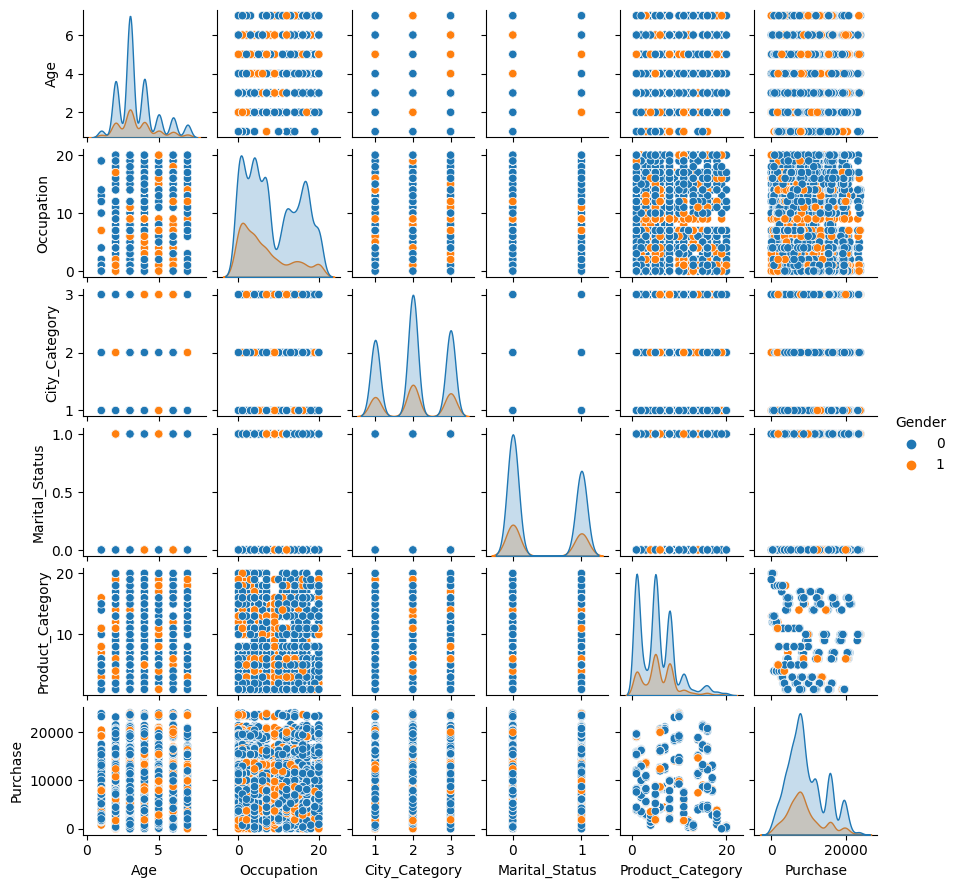

In [ ]:
# Taking a sample of 10000 entries to create pair wise plots
# Blue color dots are male. Orange are female.
sns.pairplot(df_copy.sample(10000).iloc[:,1:], hue = 'Gender', diag_kind = 'kde',height=1.5,aspect=1)
plt.show()

***Insights :***

*  Both males and females of city category B make more purchases compared to city categories A and C.
*  Females purchase products of category 4, 11, 15, 17 and 18 less often.
*  Most popular product category among males is 1.
*  Most popular product category among females is 5. It is popular among male customers as well.
*  Females with occupation 0–10 made more purchases than females with occupations 11–20.

#**Confidence Interval and CLT**

***Sampling :***

*  To, find confidence intervals we will have to take a number of samples and calculate their means.
*  The Central Limit Theorem states that the means of samples taken from any data, follow a gaussian distribution.
*  We will verify this by plotting KDE plots of the means of samples.

**1)  Male and Female users**

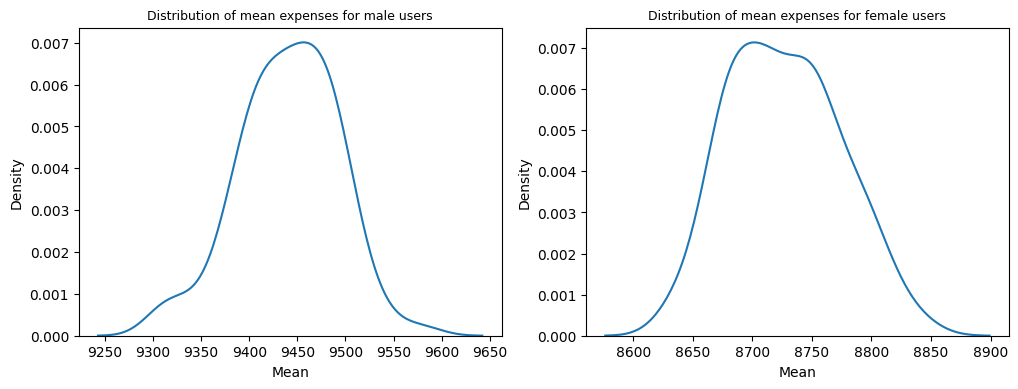

In [ ]:
# Taking random 100 samples of 10000 entries for both genders and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(12,4))
x = 1
for j in ["M","F"]:
    means = []
    for i in range(100):
        temp = df.loc[df["Gender"]==j,"Purchase"].sample(10000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(1,2,x)
    sns.kdeplot(x = means)
    if j == "M":
        gen = "male"
        means_m = means
    else:
        gen = "female"
        means_f = means
    plt.title("Distribution of mean expenses for {g} users".format(g = gen), fontsize = 9)
    plt.xlabel("Mean")
    x += 1
plt.show()

The distributions appear to be gaussian.

In [ ]:
# Finding different confidence intervals for males and females
for i in ["males", "females"]:
    print("For {g} :".format(g = i))
    if i == "males":
        means = means_m
        gen = "M"
    else:
        means = means_f
        gen = "F"
    print("Mean of sample means =",np.mean(means))
    print("Population mean =", np.mean(df.loc[df["Gender"]==gen, "Purchase"]))
    print("Standard deviation of means (Standard Error) =", np.std(means))
    print("Standard deviation of population =",df.loc[df["Gender"]==gen, "Purchase"].std() )
    print("99% CONFIDENCE INTERVAL for mean expense by {g} users :".format(g = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print("95% CONFIDENCE INTERVAL for mean expense by {g} users :".format(g = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print("90% CONFIDENCE INTERVAL for mean expense by {g} users :".format(g = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print("-"*50)

For males :
Mean of sample means = 9440.500079999998
Population mean = 9437.526040472265
Standard deviation of means (Standard Error) = 51.332641618508326
Standard deviation of population = 5092.18620977797
99% CONFIDENCE INTERVAL for mean expense by males users :
(9308.97, 9563.85)
95% CONFIDENCE INTERVAL for mean expense by males users :
(9322.77, 9527.11)
90% CONFIDENCE INTERVAL for mean expense by males users :
(9354.96, 9510.56)
--------------------------------------------------
For females :
Mean of sample means = 8727.206921999998
Population mean = 8734.565765155476
Standard deviation of means (Standard Error) = 46.33654644485833
Standard deviation of population = 4767.233289291458
99% CONFIDENCE INTERVAL for mean expense by females users :
(8635.33, 8834.92)
95% CONFIDENCE INTERVAL for mean expense by females users :
(8645.62, 8815.97)
90% CONFIDENCE INTERVAL for mean expense by females users :
(8660.97, 8803.72)
--------------------------------------------------


***Insights :***

*  Mean purchase amount for females = 8734.56
*  Mean purchase amount for males = 9437.52
*  95% confidence interval for purchase amounts of females is less than males without any intersection.
*  We can say with 95% confidence that females spend less than males.

***Recommendations :***

*  Promotion for products which cost between 9344 and 9523 can be targetted towards males.
*  Promotion for products which cost between 8647 and 8819 can be targetted towards females.

**2) Married and Unmarried users**

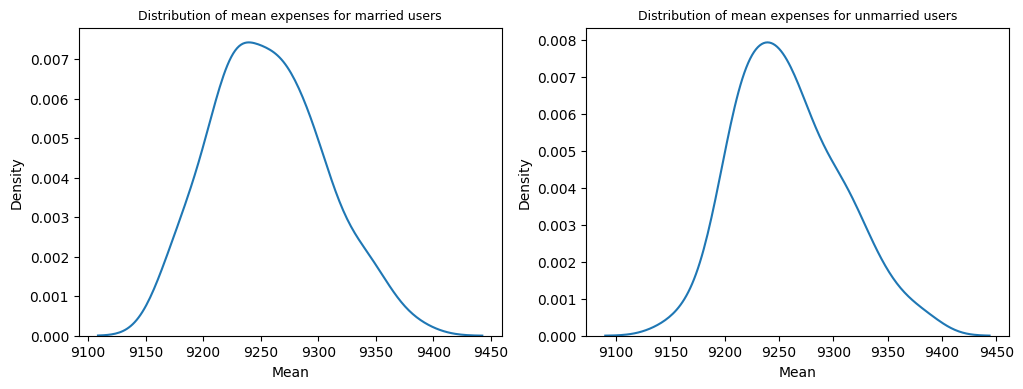

In [ ]:
# Taking random 100 samples of 10000 entries for married and unmarried users
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(12,4))
x = 1
for j in [1,0]:
    means = []
    for i in range(100):
        temp = df.loc[df["Marital_Status"]==j,"Purchase"].sample(10000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(1,2,x)
    sns.kdeplot(x = means)
    if j == 0 :
        m_s = "unmarried"
        means_mrr = means
    else:
        m_s = "married"
        means_umrr = means
    plt.title("Distribution of mean expenses for {ms} users".format(ms = m_s), fontsize = 9)
    plt.xlabel("Mean")
    x += 1
plt.show()

In [ ]:
# Finding different confidence intervals for married and unmarried
for i in ["married", "unmarried"]:
    print("For {ms} :".format(ms = i))
    if i == "married":
        means = means_mrr
        m_s = 1
    else:
        means = means_umrr
        m_s = 0
    print("Mean of sample means =",np.mean(means))
    print("Population mean =", np.mean(df.loc[df["Marital_Status"]==m_s, "Purchase"]))
    print("Standard deviation of means (Standard Error) =", np.std(means))
    print("Standard deviation of population =",df.loc[df["Marital_Status"]==m_s, "Purchase"].std() )
    print("99% CONFIDENCE INTERVAL for mean expense by {ms} users :".format(ms = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print("95% CONFIDENCE INTERVAL for mean expense by {ms} users :".format(ms = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print("90% CONFIDENCE INTERVAL for mean expense by {ms} users :".format(ms = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print("-"*50)

For married :
Mean of sample means = 9258.629131
Population mean = 9261.174574082374
Standard deviation of means (Standard Error) = 47.99877558662656
Standard deviation of population = 5016.897377793055
99% CONFIDENCE INTERVAL for mean expense by married users :
(9160.01, 9383.95)
95% CONFIDENCE INTERVAL for mean expense by married users :
(9178.06, 9358.76)
90% CONFIDENCE INTERVAL for mean expense by married users :
(9192.55, 9340.6)
--------------------------------------------------
For unmarried :
Mean of sample means = 9256.416463999998
Population mean = 9265.907618921507
Standard deviation of means (Standard Error) = 47.788715384545526
Standard deviation of population = 5027.347858674449
99% CONFIDENCE INTERVAL for mean expense by unmarried users :
(9167.49, 9373.61)
95% CONFIDENCE INTERVAL for mean expense by unmarried users :
(9175.07, 9351.95)
90% CONFIDENCE INTERVAL for mean expense by unmarried users :
(9180.98, 9340.99)
--------------------------------------------------


***Insights :***

*  Mean expense by married customers is 9261.17
*  Mean expense by unmarried customers is 9265.90
*  There's is overlap between 90%, 95% and 99% confidence intervals for both.
*  We don't have enough statistical evidence to compare their expenses.

**3) For different age groups**

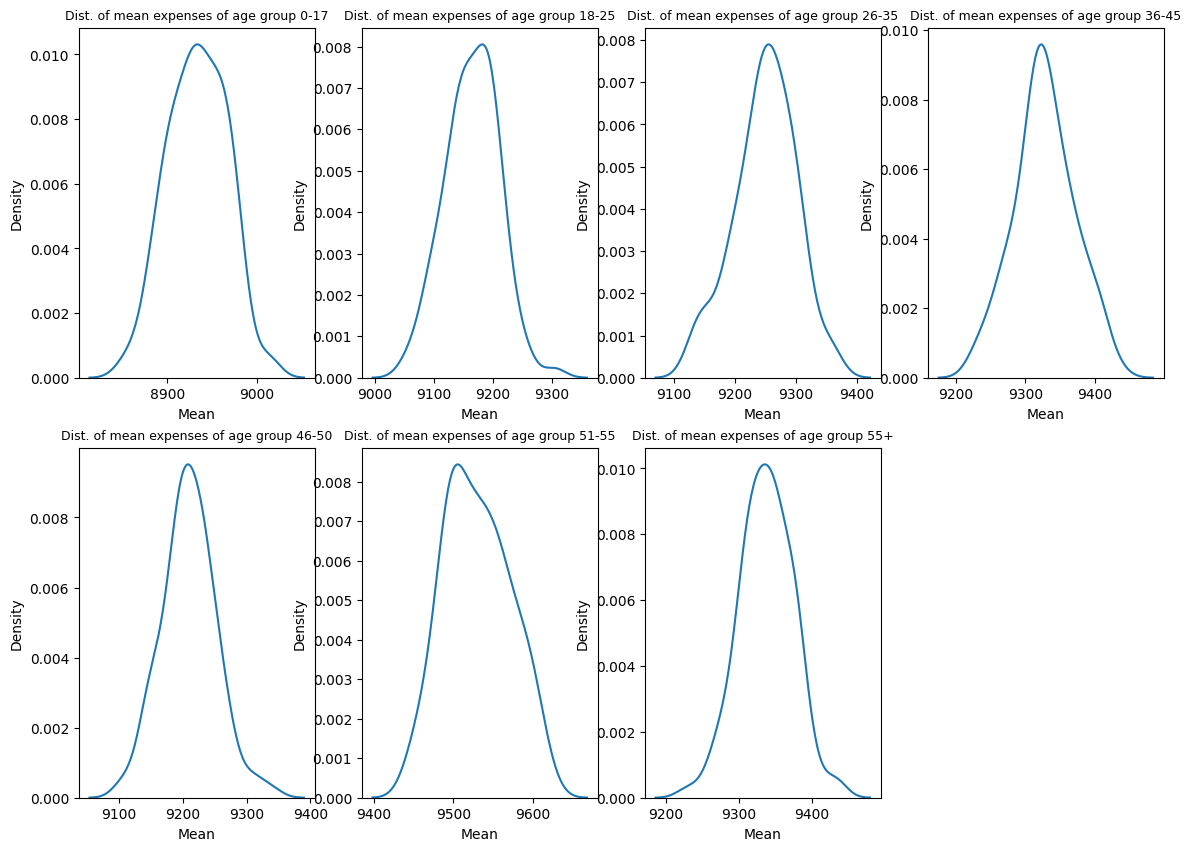

In [ ]:
# Taking random 100 samples of 10000 entries for each age groups.
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(14,10))
x = 1
for j in  ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"] :
    means = []
    for i in range(100):
        temp = df.loc[df["Age"]==j,"Purchase"].sample(10000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,4,x)
    sns.kdeplot(x = means)
    if j == "0-17":
        means_0 = means
    elif j == "18-25":
        means_18 = means
    elif j == "26-35":
        means_26 = means
    elif j == "36-45":
        means_36 = means
    elif j == "46-50" :
        means_46 = means
    elif j == "51-55" :
        means_51 = means
    else:
        means_55 = means
    plt.title('Dist. of mean expenses of age group {a}'.format(a = j), fontsize=9)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [ ]:
# Finding confidence intervals for mean purchase for each age group in two part for better visualisation.
for i in ["0-17", "18-25", "26-35", "36-45"] :
    print("For {m} :".format(m = i))
    if i == "0-17":
        means = means_0
    elif i == "18-25":
        means = means_18
    elif i == "26-35":
        means = means_26
    elif i == "36-45":
        means = means_36
    print("Mean of sample means =",np.mean(means))
    print("Population mean =", np.mean(df.loc[df["Age"]==i, "Purchase"]))
    print("Standard deviation of means (Standard Error) =", np.std(means))
    print("Standard deviation of population =",df.loc[df["Age"]==i, "Purchase"].std() )
    print("99% CONFIDENCE INTERVAL for mean expense by users of age group {a} :".format(a = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print("95% CONFIDENCE INTERVAL for mean expense by users of age group {a} :".format(a = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print("90% CONFIDENCE INTERVAL for mean expense by users of age group {a} :".format(a = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print("-"*50)

For 0-17 :
Mean of sample means = 8933.728919000001
Population mean = 8933.464640444974
Standard deviation of means (Standard Error) = 32.6843805981564
Standard deviation of population = 5111.11404600277
99% CONFIDENCE INTERVAL for mean expense by users of age group 0-17 :
(8856.28, 9013.21)
95% CONFIDENCE INTERVAL for mean expense by users of age group 0-17 :
(8876.22, 8985.34)
90% CONFIDENCE INTERVAL for mean expense by users of age group 0-17 :
(8881.33, 8981.33)
--------------------------------------------------
For 18-25 :
Mean of sample means = 9164.497743
Population mean = 9169.663606261289
Standard deviation of means (Standard Error) = 45.20947893598474
Standard deviation of population = 5034.32199717658
99% CONFIDENCE INTERVAL for mean expense by users of age group 18-25 :
(9058.99, 9283.16)
95% CONFIDENCE INTERVAL for mean expense by users of age group 18-25 :
(9076.19, 9247.16)
90% CONFIDENCE INTERVAL for mean expense by users of age group 18-25 :
(9090.15, 9228.51)
--------

In [ ]:
# Finding confidence intervals for mean purchase for each age group in two part for better visualisation.
for i in ["46-50", "51-55", "55+"] :
    print("For {m} :".format(m = i))
    if i == "46-50":
        means = means_46
    elif i == "51-55":
        means = means_51
    elif i == "55+" :
        means = means_55

    print("Mean of sample means =",np.mean(means))
    print("Population mean =", np.mean(df.loc[df["Age"]==i, "Purchase"]))
    print("Standard deviation of means (Standard Error) =", np.std(means))
    print("Standard deviation of population =",df.loc[df["Age"]==i, "Purchase"].std() )
    print("99% CONFIDENCE INTERVAL for mean expense by users of age group {a} :".format(a = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print("95% CONFIDENCE INTERVAL for mean expense by users of age group {a} :".format(a = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print("90% CONFIDENCE INTERVAL for mean expense by users of age group {a} :".format(a = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print("-"*50)

For 46-50 :
Mean of sample means = 9209.652229
Population mean = 9208.625697468327
Standard deviation of means (Standard Error) = 41.98794126217974
Standard deviation of population = 4967.216367142941
99% CONFIDENCE INTERVAL for mean expense by users of age group 46-50 :
(9108.47, 9326.36)
95% CONFIDENCE INTERVAL for mean expense by users of age group 46-50 :
(9138.0, 9299.63)
90% CONFIDENCE INTERVAL for mean expense by users of age group 46-50 :
(9143.06, 9275.8)
--------------------------------------------------
For 51-55 :
Mean of sample means = 9530.050837000003
Population mean = 9534.808030960236
Standard deviation of means (Standard Error) = 41.02369497294605
Standard deviation of population = 5087.368079602135
99% CONFIDENCE INTERVAL for mean expense by users of age group 51-55 :
(9449.56, 9615.13)
95% CONFIDENCE INTERVAL for mean expense by users of age group 51-55 :
(9455.9, 9604.39)
90% CONFIDENCE INTERVAL for mean expense by users of age group 51-55 :
(9467.36, 9600.14)
----

**Insights :**

*  99% Confidence Interval for 0-17 is less than 51–55 without overlap.
*  We can say with 99% confidence that expense of 0–17 is less compared to expense of 51–55 ages.

**Recommendations :**

*  Promotion for products which cost between 9449 to 9637 can be targetted towards 51–55 year old customers.
*  Promotion for products which cost between 8883 to 8989 can be targetted towards 0–17 year old customers.

#**Final Insights and Recommendations**

#**Final Insights and Recommendations**

***Final Insights :***

*  P00265242 is the most sold product.
*  People in age group of 26-35 make more purchases than any other age groups.
*  Peopple of city category B make more purchases than other city categories.
*  People who have stayed in their city for only one year make more purchases than others.
*  Product categories 5,1 and 8 sell more than other categories.
*  Median purchase amount of occupations 12 and 17 are slightly higher than other occupations.
*  More users are Single as compare to Married.
*  People of occupation 0,4 and 7 have made more purchases than other occupations.
*  Mean purchase amount for females = 8734.56
*  Mean purchase amount for males = 9437.52
*  95% confidence interval for purchase amounts of females is less than males without any intersection.
*  We can say with 95% confidence that females spend less than males.

***Final Recommendations :***

*  Walmart can keep products like P00265242 and P00025442 (which are selling a lot) in the inventory.
*  Products like P00056342 P00350742 (which are not selling) need not be kept lots of inventory in store.
*  Promotional activity can be targeted towards people of age group 26–35, since they are making maximum purchases. Walmart can also include new products required by people of this age group.
*  Promotional activity can be targeted towards people of city category B. Inventory in these cities can be replenished.
*  Promotional activity for slightly expensive products can be targetted towards people with occupation 12 and 17.
*  Give offers/rewards on purchases above 12000 to nudge customers to spend more.
*  Target Promotional activity towards people who have spent between 1 to 2 years in their city.
*  Target Promotional activity towards unmarried people.
*  Target Promotional activity for products which cost between 9344 and 9523 towards males.
*  Target Promotional activity for products which cost between 8647 and 8819 towards females.
*  Target Promotional activity for products which cost between 9449 to 9637 towards 51–55 year old people.
*  Target Promotional activity for products which cost between 8883 to 8989 towards 0–17 year old people.
*  Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
*  Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. it means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
*  Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
*  Customers in the age 18-45 spend more money than the others, So company should focus on acquisition of customers who are in the age 18-45